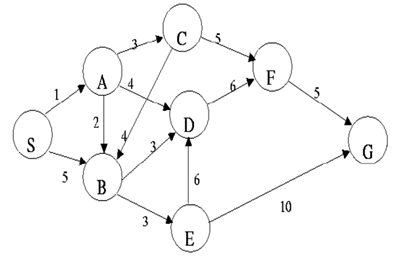

In the above graph, the start state is **S**, and the goal state is **G**. The transition costs are next to the edges, and the heuristic estimate, h, of the distance from the state to the goal is in the state’s node.
<br>
Call **UCS**, **GBF** and  **A star** for this graph. Also insert the drawing of simulations one by one.

In [3]:
graph1 = {'S':{'A':1,'B':5},
            'A':{'B':2,'C':3,'D':4},
            'B':{'D':3,'E':3},
            'C':{'B':4,'F':5},
            'D':{'F':6},
            'E':{'D':6,'G':10},
            'F':{'G':5},
            'G':{}
            }

# Uniform Cost Search
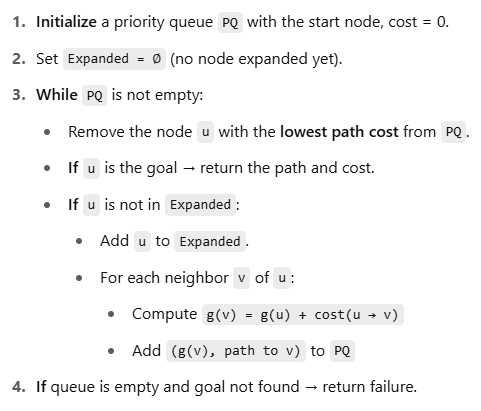

In [4]:
from queue import PriorityQueue
def ucs(start, goal, G):
    # by default the expanded list is empty
    expanded= []

    # we don't store only node names rather the paths to the nodes and path costs are also stored
    pq = PriorityQueue()
    pq.put((0, [start]))

    # repeat untill the goal test satisfied or the queue becomes empty
    while not pq.empty():
        # print the queue
        print()
        print(f'Queue:',end='')
        for cost,path in pq.queue:
          print('-'.join(path), end = '')
          print(f':{cost}',end=', ')
        #print('-'.join(queue[-1]))
        # selceting the node
        ucost, upath = pq.get() # select a node for expansion
        u = upath[-1]
        print()
        for node in upath[:-1]: print(node,end='-')
        print(f'{u} is selected.', end=' ')

        if u in expanded:
          continue
        # goal test
        if u == goal:
          print(f'{goal} is SELECTED and Goal test is satisfied.')
          return upath,ucost # breaking from while
        # if v is not a goal node insert in queue
        print(f'Expanded list:', end=' ')
        for node in expanded: print(node,end=',')
        print(u)
        expanded.append(u)

        for v in G[u].keys(): # ['Sibiu', 'Zerind', 'Timisoara']
            # process if v is not EXPANDED yet
            if v not in expanded:
              vpath = upath + [v]
              vcost = ucost + G[u][v] #remember the formula g(n')=g(n)+c(n,n')

              #for node in upath: print(node,end='-')
              #print(f'{v}:{vcost}')

              pq.put((vcost,vpath))# store the generated node in the frontier

    print('Failed')

In [5]:
ucs('S', 'G', graph1)


Queue:S:0, 
S is selected. Expanded list: S

Queue:S-A:1, S-B:5, 
S-A is selected. Expanded list: S,A

Queue:S-A-B:3, S-A-D:5, S-A-C:4, S-B:5, 
S-A-B is selected. Expanded list: S,A,B

Queue:S-A-C:4, S-A-D:5, S-B:5, S-A-B-D:6, S-A-B-E:6, 
S-A-C is selected. Expanded list: S,A,B,C

Queue:S-A-D:5, S-A-B-D:6, S-B:5, S-A-B-E:6, S-A-C-F:9, 
S-A-D is selected. Expanded list: S,A,B,C,D

Queue:S-B:5, S-A-B-D:6, S-A-C-F:9, S-A-B-E:6, S-A-D-F:11, 
S-B is selected. 
Queue:S-A-B-D:6, S-A-B-E:6, S-A-C-F:9, S-A-D-F:11, 
S-A-B-D is selected. 
Queue:S-A-B-E:6, S-A-D-F:11, S-A-C-F:9, 
S-A-B-E is selected. Expanded list: S,A,B,C,D,E

Queue:S-A-C-F:9, S-A-D-F:11, S-A-B-E-G:16, 
S-A-C-F is selected. Expanded list: S,A,B,C,D,E,F

Queue:S-A-D-F:11, S-A-B-E-G:16, S-A-C-F-G:14, 
S-A-D-F is selected. 
Queue:S-A-C-F-G:14, S-A-B-E-G:16, 
S-A-C-F-G is selected. G is SELECTED and Goal test is satisfied.


(['S', 'A', 'C', 'F', 'G'], 14)

Task 01: Based on the above UCS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

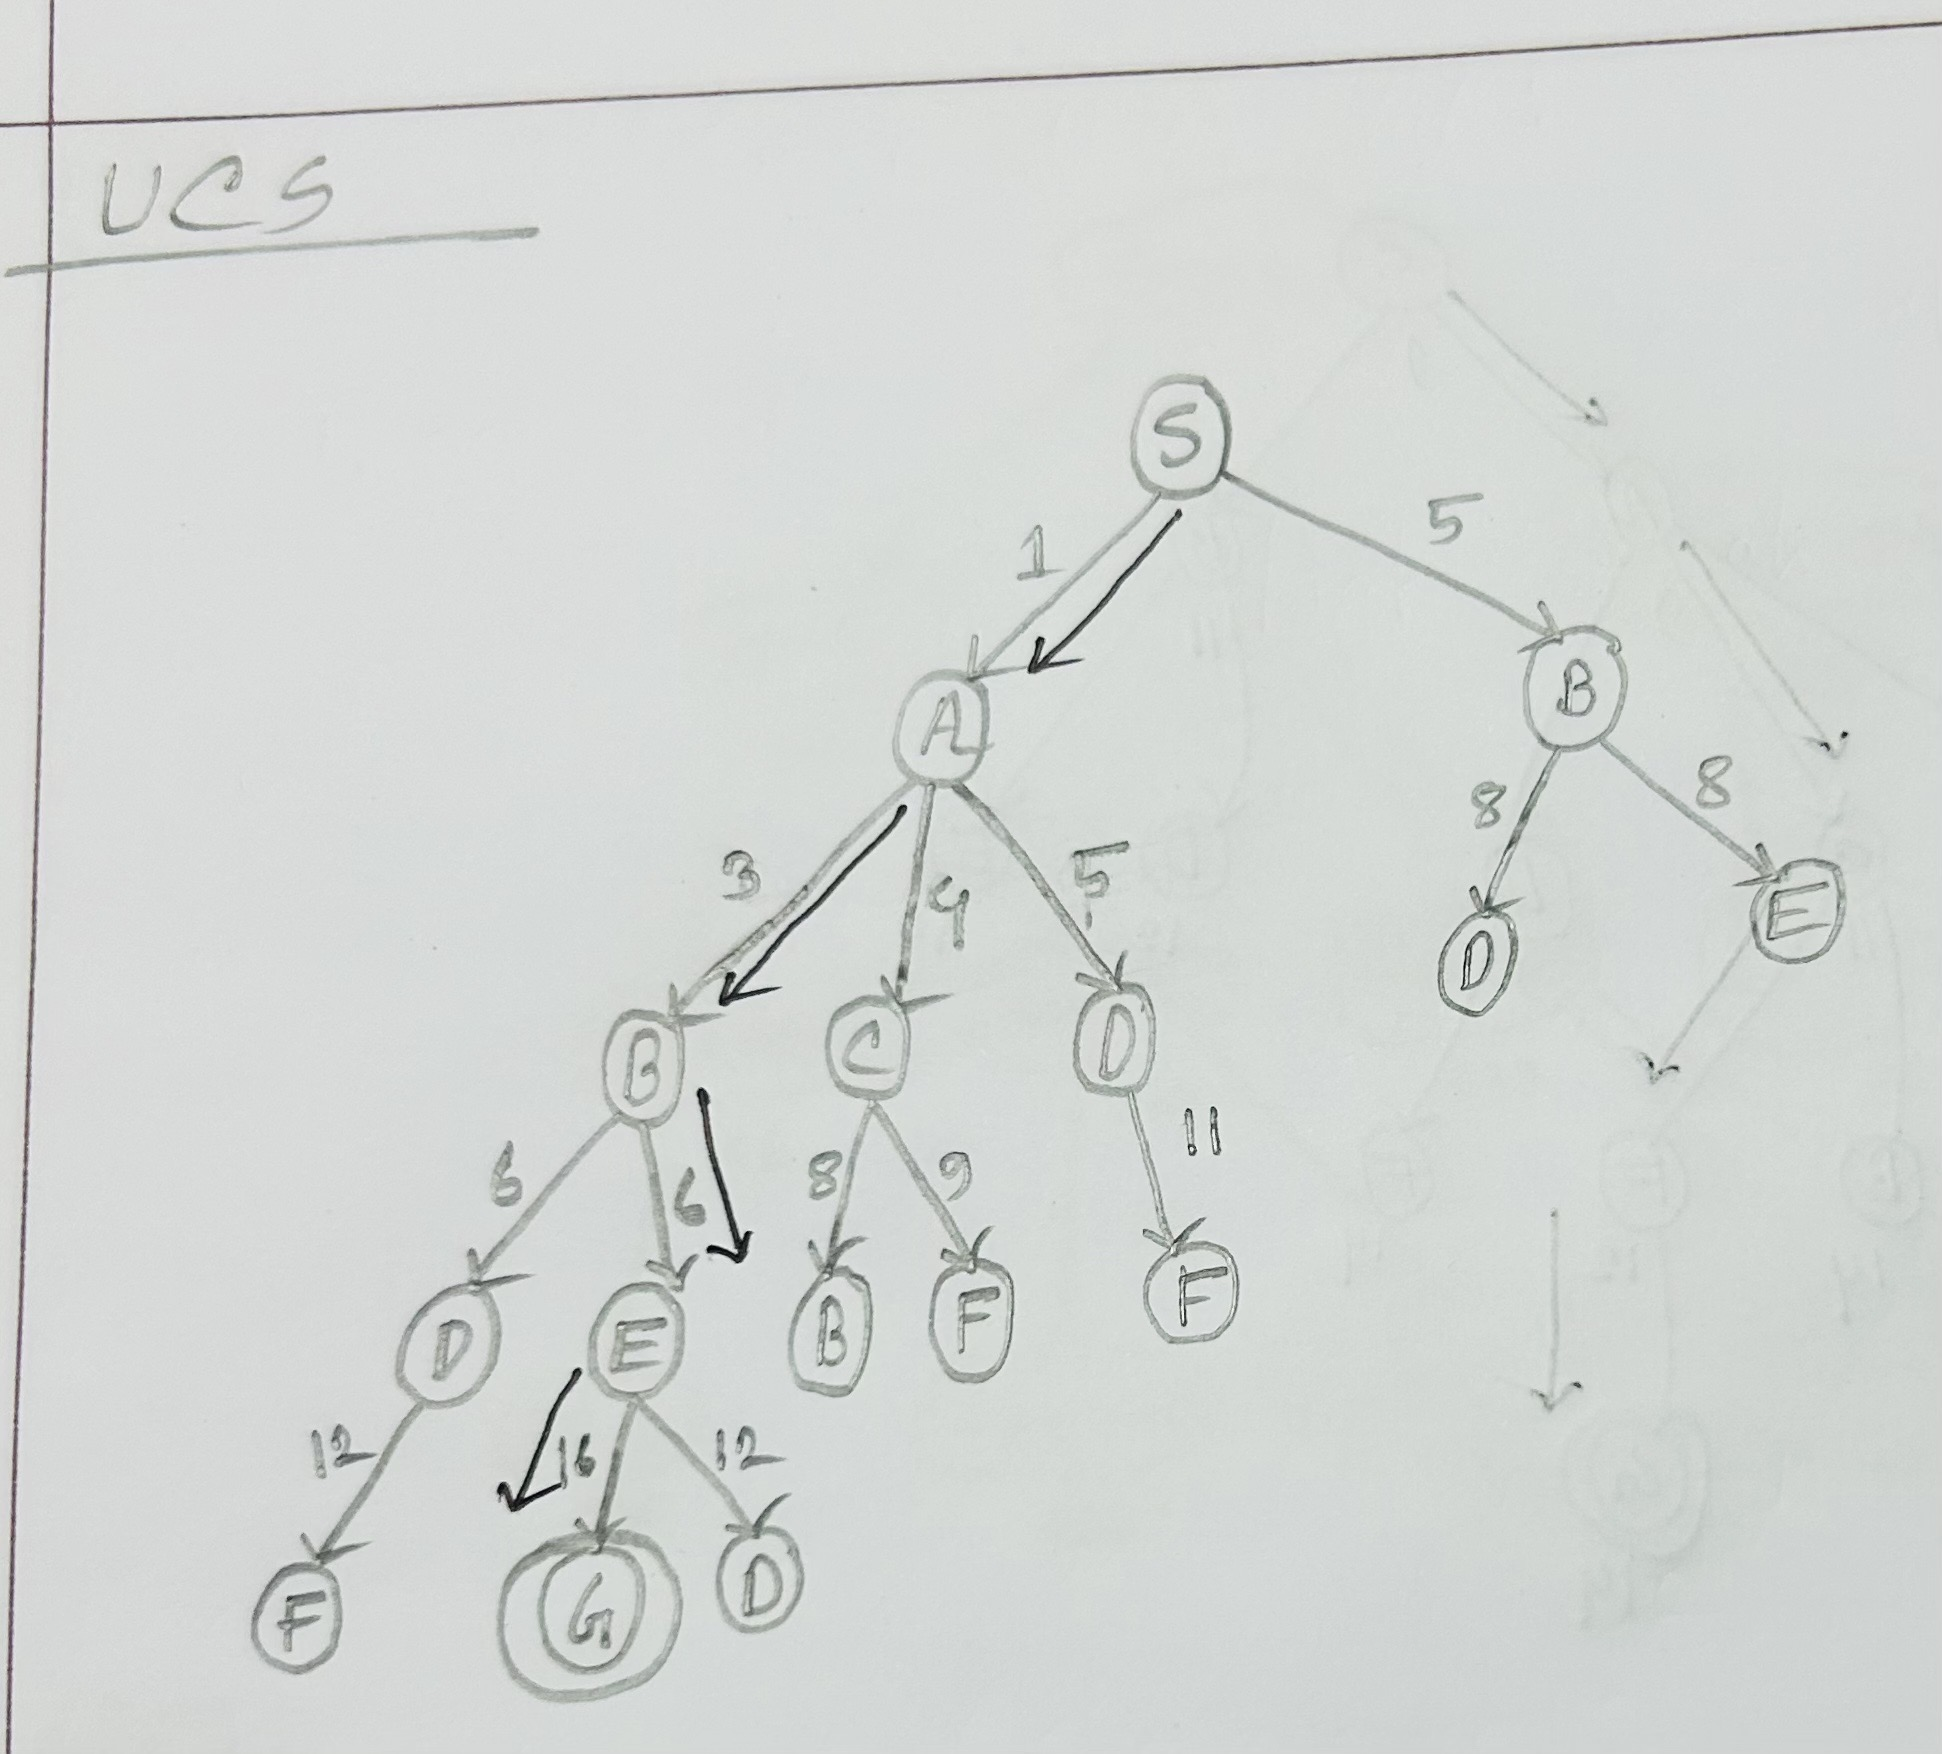

# Greedy Best First Search
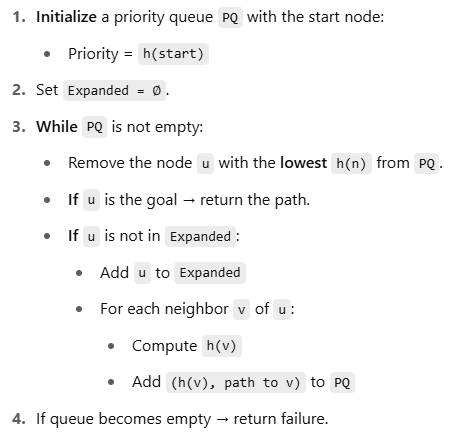

In [ ]:
from queue import PriorityQueue
def gbfs(start, goal, G, hr):
    # by default the expanded list is empty
    expanded= []

    # we don't store only node names rather the paths to the nodes and path costs are also stored
    pq = PriorityQueue()
    pq.put((hr[start], 0, [start]))

    # repeat untill the goal test satisfied or the queue becomes empty
    while not pq.empty():
        # print the queue
        print()
        print(f'Queue:',end='')
        for h,cost,path in pq.queue:
          print('-'.join(path), end = '')
          print(f':{h}',end=', ')

        _ , ucost, upath = pq.get() # select a node for expansion
        u = upath[-1]
        print()
        for node in upath[:-1]: print(node,end='-')
        print(f'{u} is selected.', end=' ')

        if u in expanded:
          continue
        # goal test
        if u == goal:
          print(f'{goal} is SELECTED and Goal test is satisfied.')
          return upath,ucost # breaking from while
        # if v is not a goal node insert in queue
        print(f'Expanded list:', end=' ')
        for node in expanded: print(node,end=',')
        print(u)
        expanded.append(u)

        for v in G[u].keys(): # ['Sibiu', 'Zerind', 'Timisoara']

            # process if v is not EXPANDED yet
            if v not in expanded:
              vpath = upath + [v]
              vcost = ucost + G[u][v] #remember the formula g(n')=g(n)+c(n,n')
              pq.put((hr[v],vcost,vpath))# store the generated node in the frontier

    print('Failed')

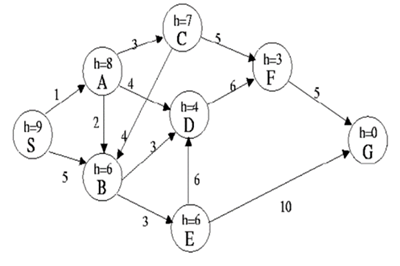

In [ ]:
graph1_h = {'S':9,'A':8,'B':6,'C':7,'D':4,'E':6,'F':3,'G':0}
gbfs('S', 'G', graph1, graph1_h)


Queue:S:9, 
S is selected. Expanded list: S

Queue:S-B:6, S-A:8, 
S-B is selected. Expanded list: S,B

Queue:S-B-D:4, S-A:8, S-B-E:6, 
S-B-D is selected. Expanded list: S,B,D

Queue:S-B-D-F:3, S-A:8, S-B-E:6, 
S-B-D-F is selected. Expanded list: S,B,D,F

Queue:S-B-D-F-G:0, S-A:8, S-B-E:6, 
S-B-D-F-G is selected. G is SELECTED and Goal test is satisfied.


(['S', 'B', 'D', 'F', 'G'], 19)

Task 02: Based on the above GBFS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

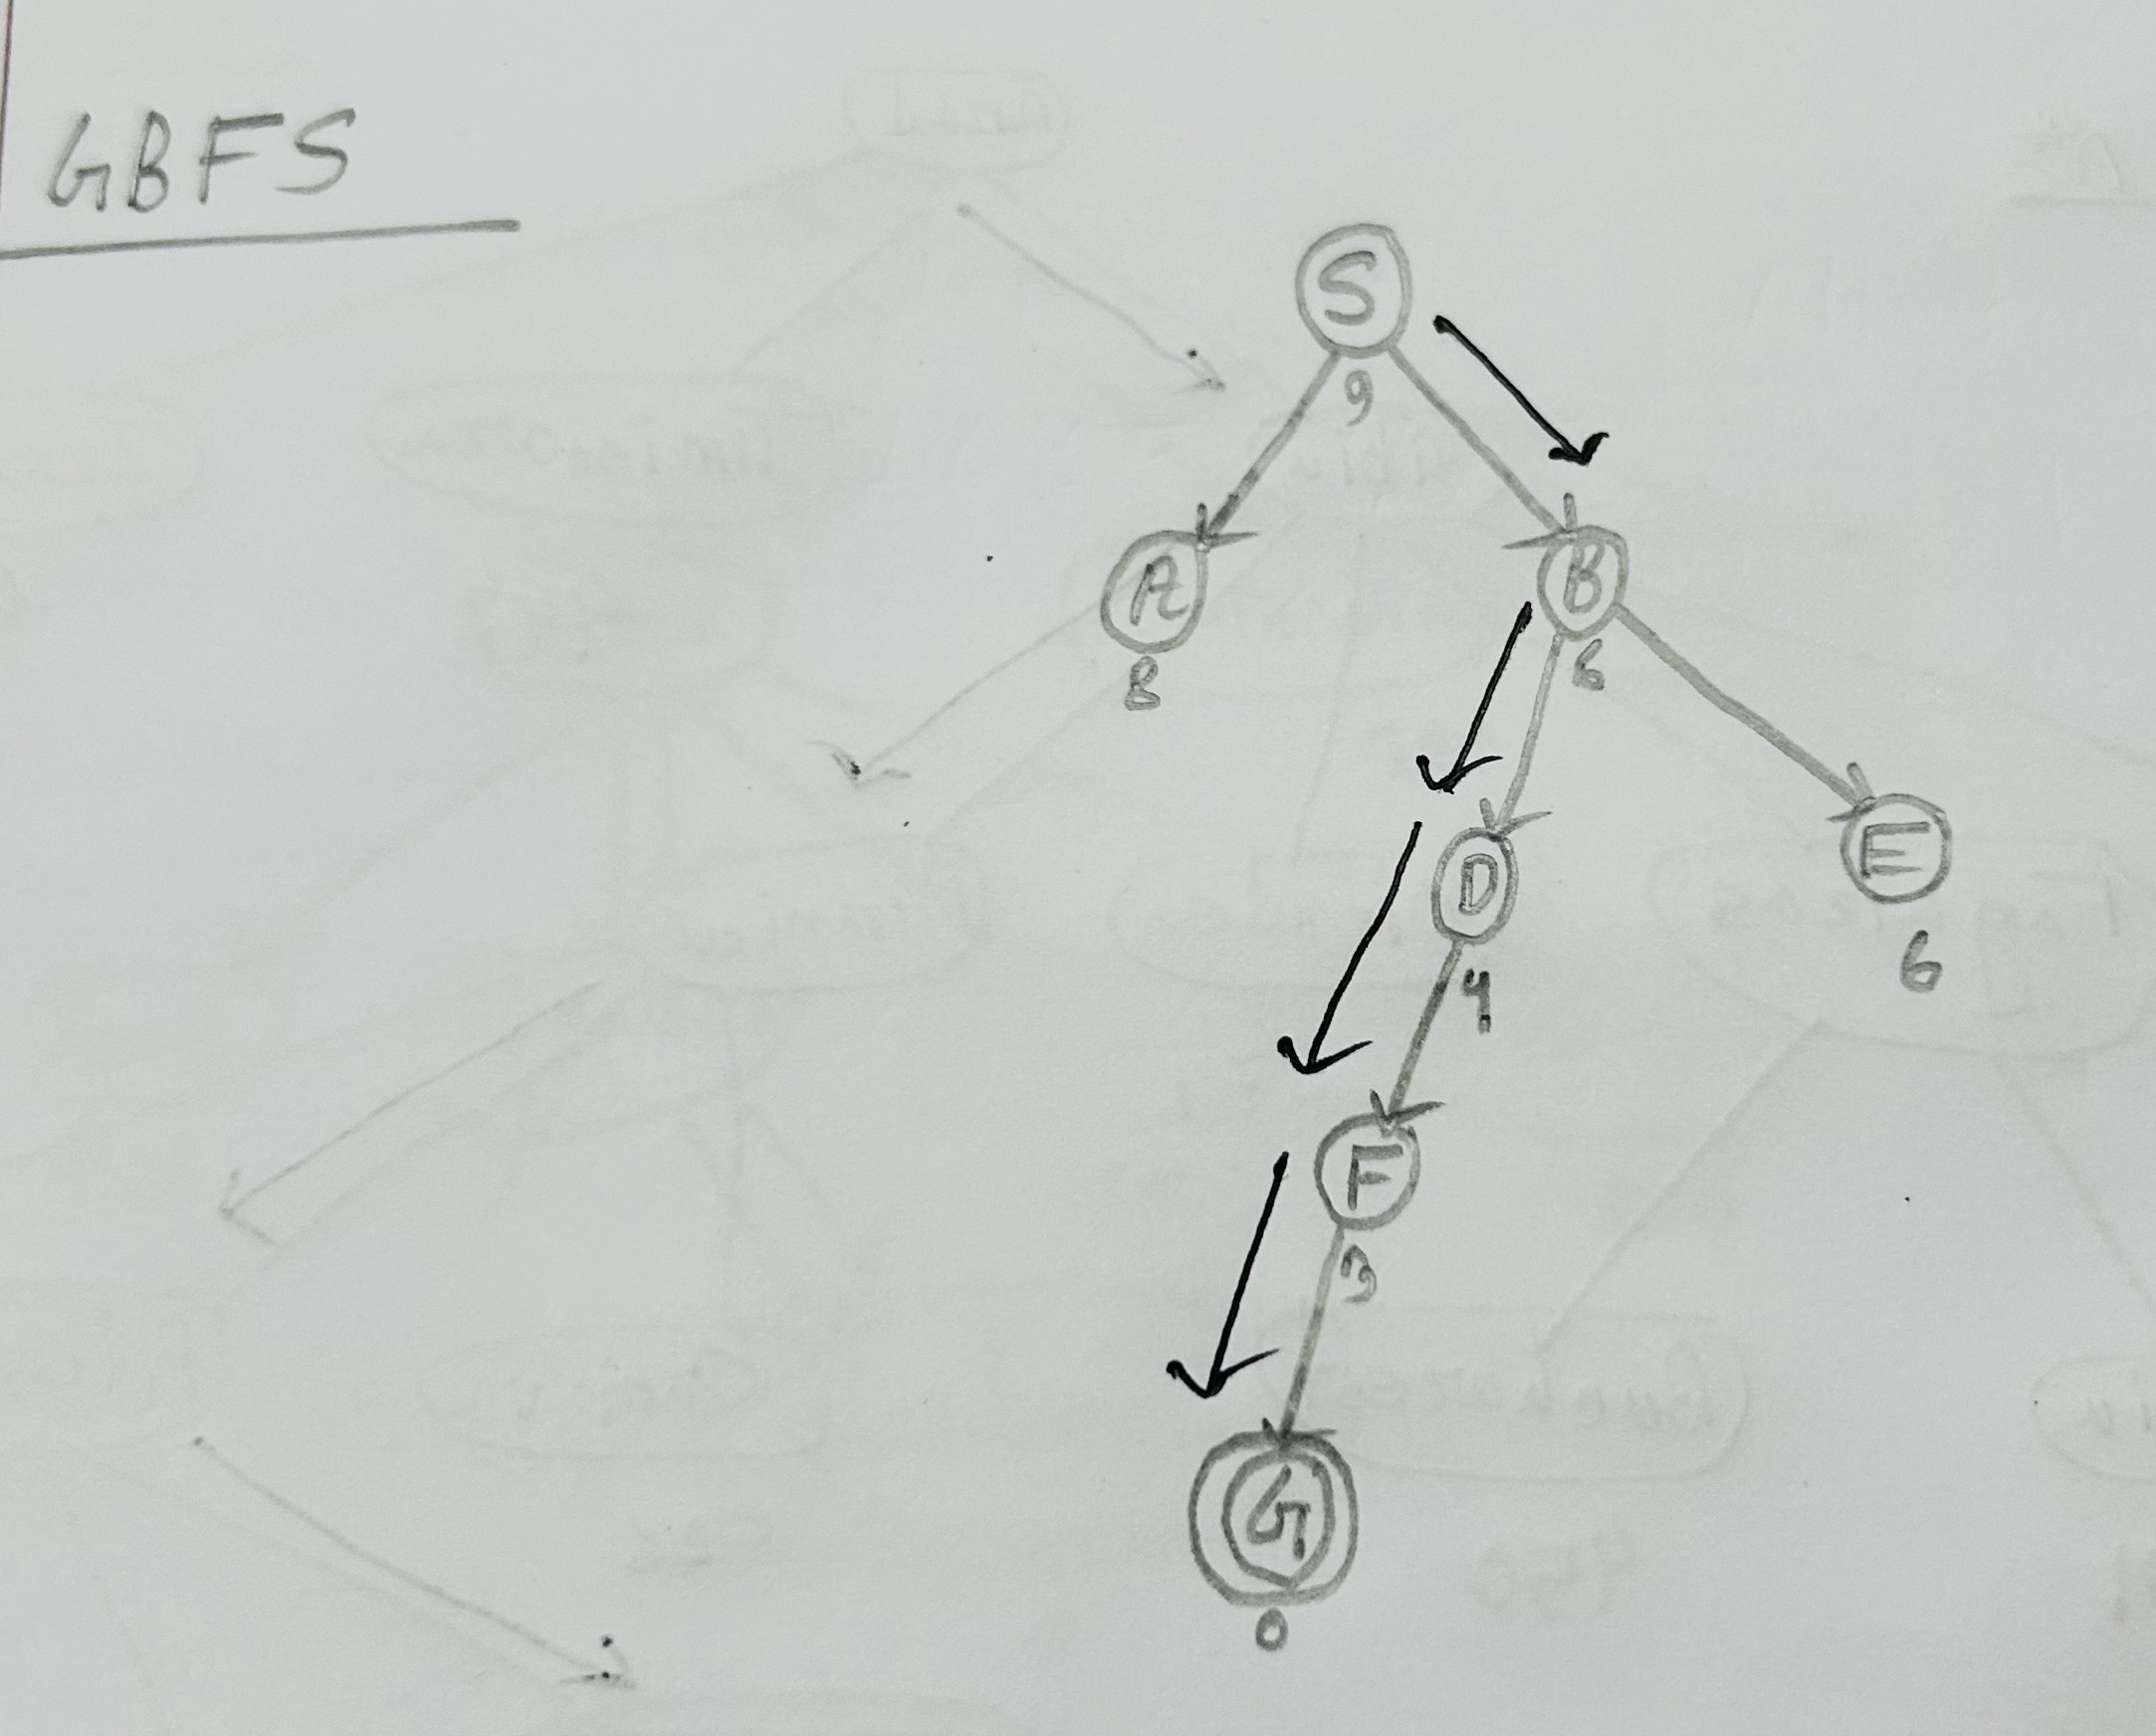

Task 03# A* search code




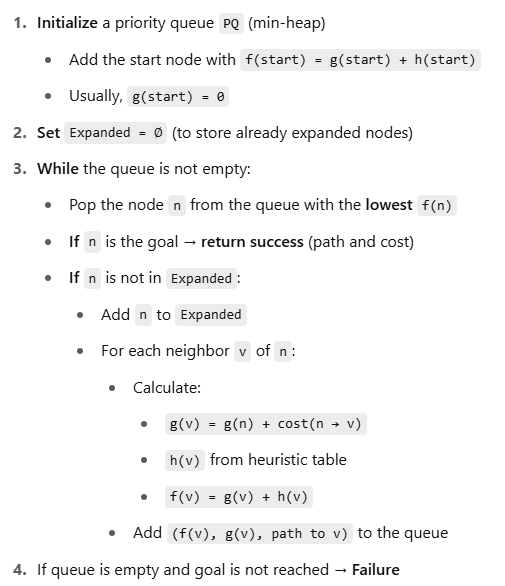



image.png
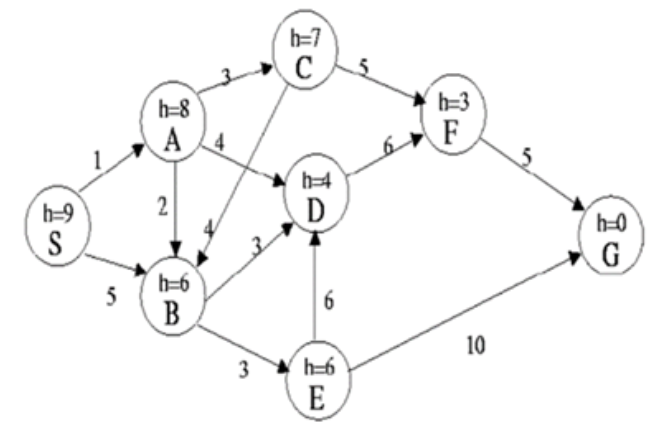


In [12]:
from queue import PriorityQueue

def astar(start, goal, G, hr):
    pq = PriorityQueue()
    pq.put((hr[start], 0, [start]))  # (f = g + h, g, path)
    best_g = {start: 0}  # Stores the lowest cost to reach each node
    visited = set()      # Track visited nodes for goal test

    while not pq.empty():
        fcost, gcost, path = pq.get()
        u = path[-1]

        if u in visited:
            continue

        visited.add(u)

        # ✅ Goal check
        if u == goal:
            return path, gcost

        # 🔁 Explore neighbors
        for v in G[u]:
            g_v = gcost + G[u][v]
            if v not in best_g or g_v < best_g[v]:
                best_g[v] = g_v
                f_v = g_v + hr[v]
                pq.put((f_v, g_v, path + [v]))

    return None, float('inf')  # If no path is found


In [13]:
graph1 = {
    'S': {'A':1, 'B':5},
    'A': {'B':2, 'C':3, 'D':4},
    'B': {'D':3, 'E':3},
    'C': {'B':4, 'F':5},
    'D': {'F':6},
    'E': {'D':6, 'G':10},
    'F': {'G':5},
    'G': {}
}

graph1_h = {'S':9, 'A':8, 'B':6, 'C':7, 'D':4, 'E':6, 'F':3, 'G':0}

# Run A*
path, cost = astar('S', 'G', graph1, graph1_h)
print("Path:", ' -> '.join(path))
print("Total cost:", cost)


Path: S -> A -> C -> F -> G
Total cost: 14


Task 04: Based on the above A* simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

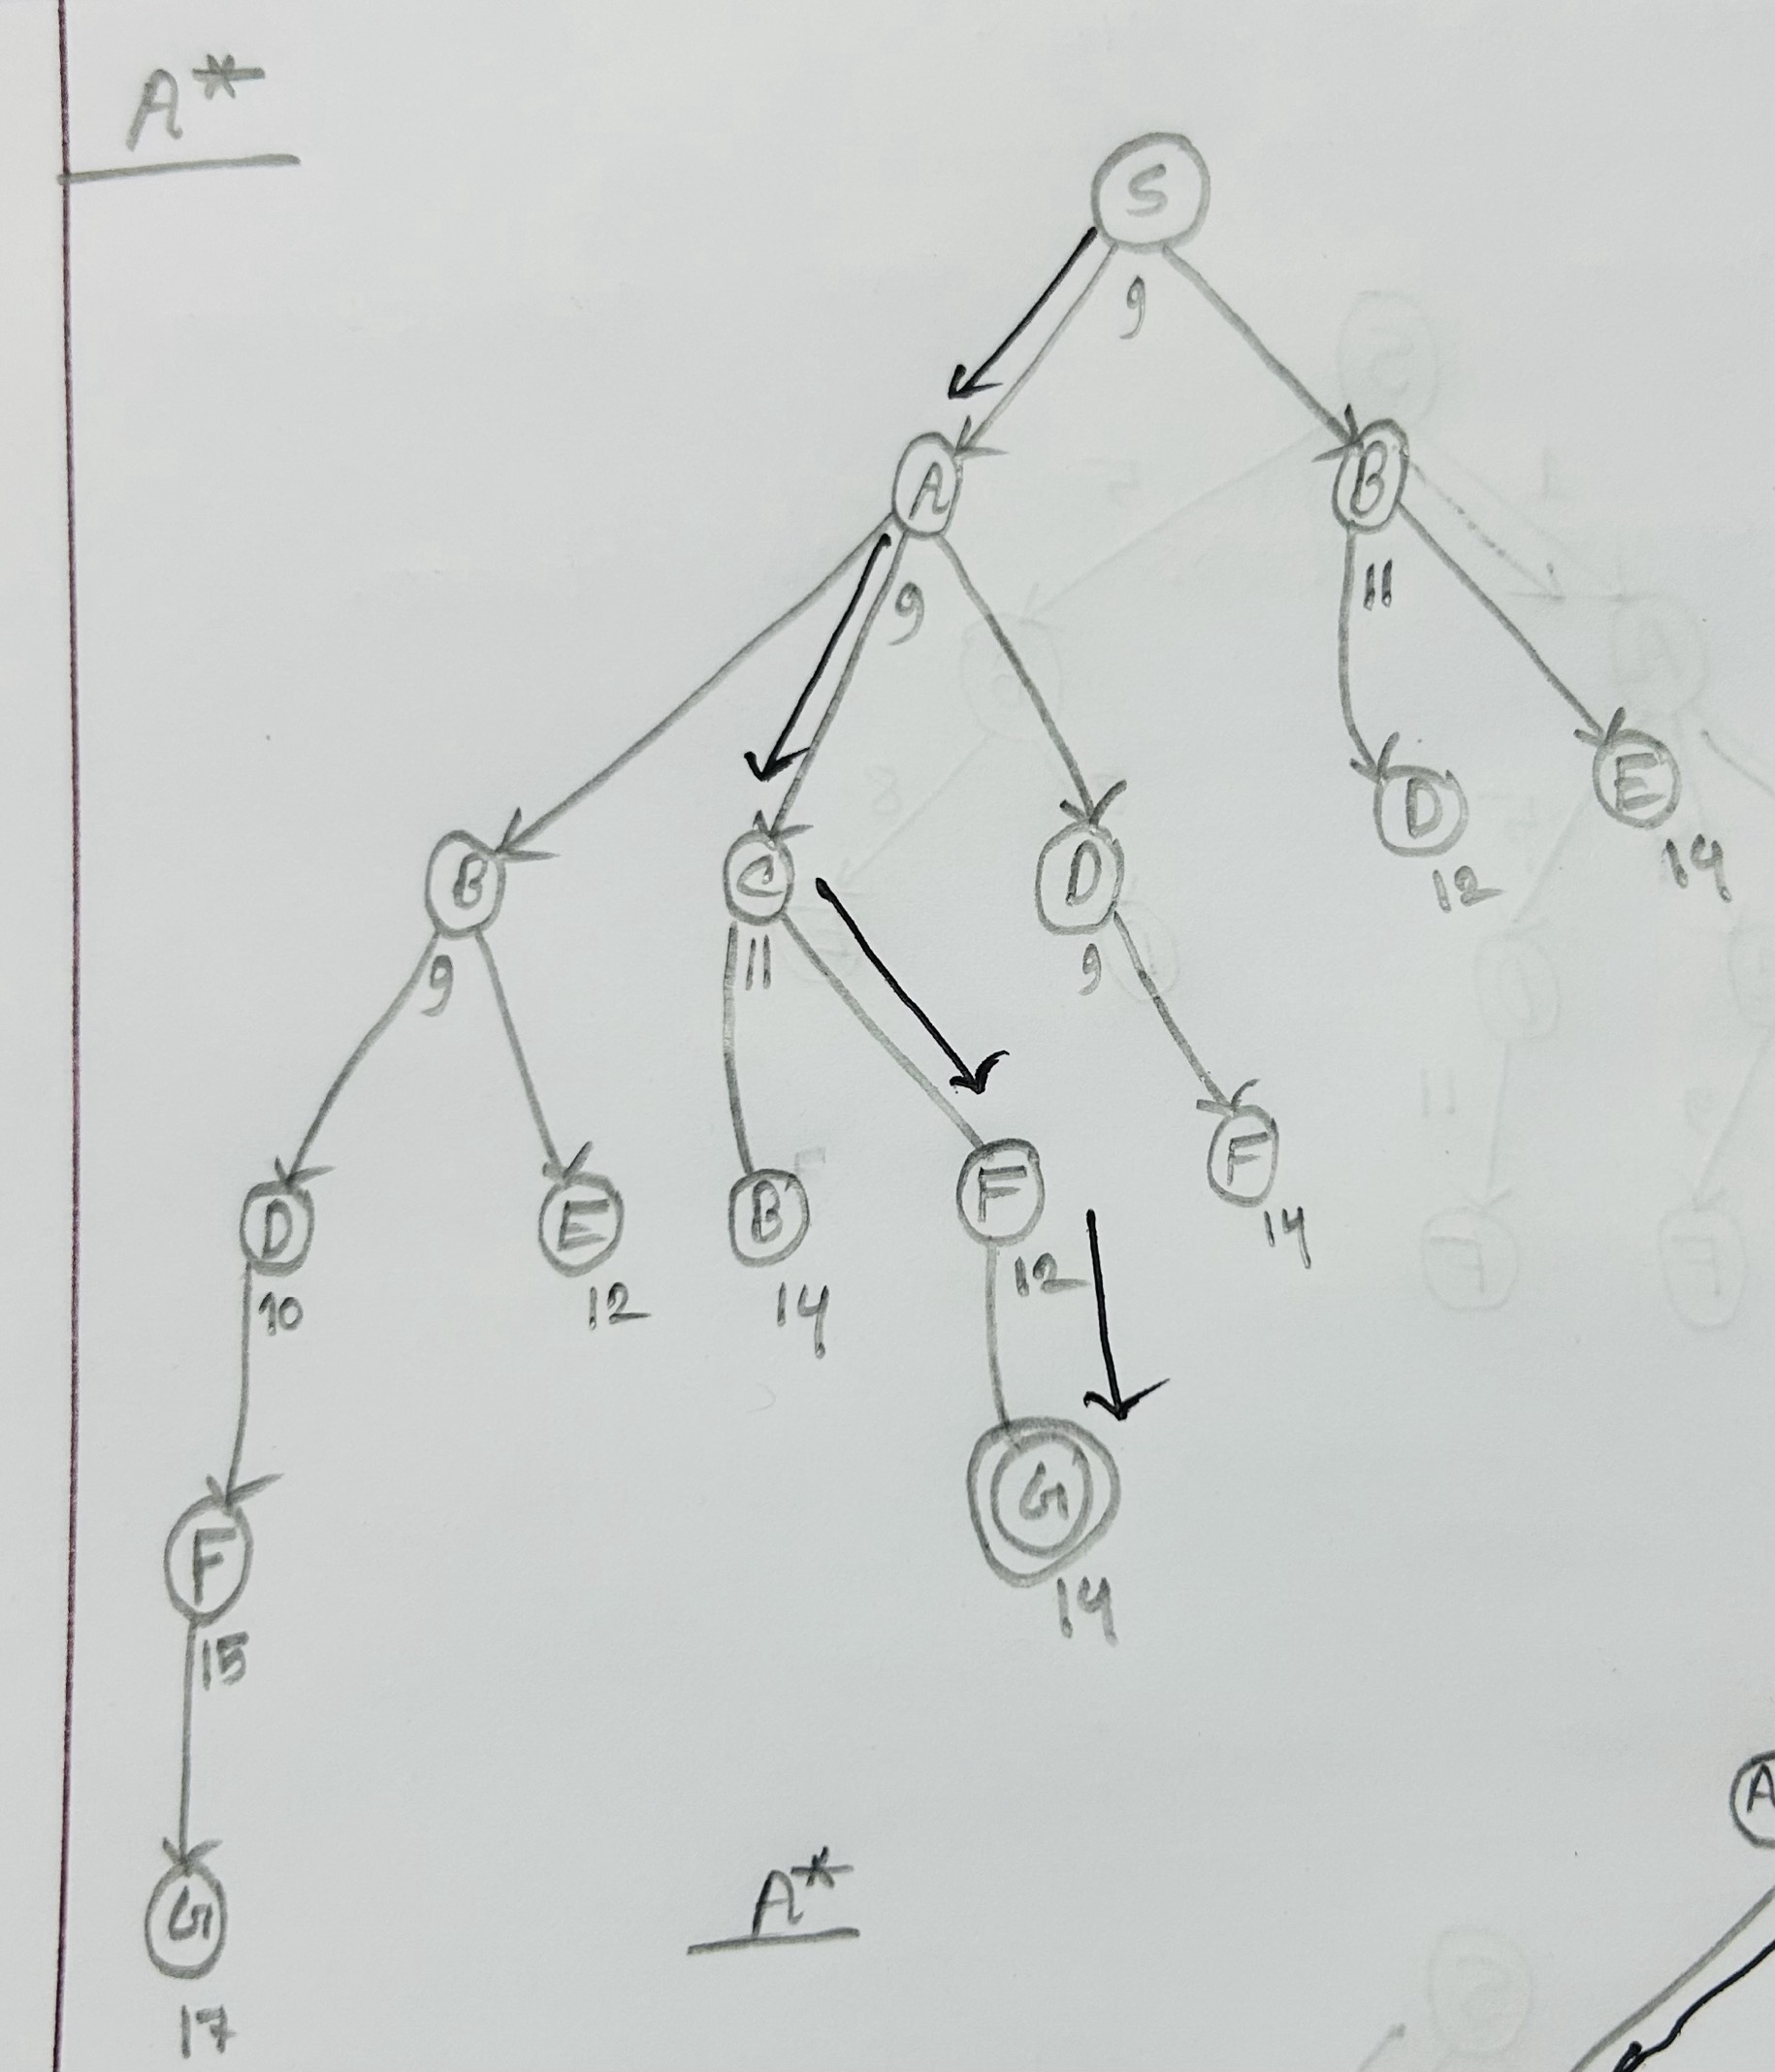

# Another Example

**Arad --> Bucharest**

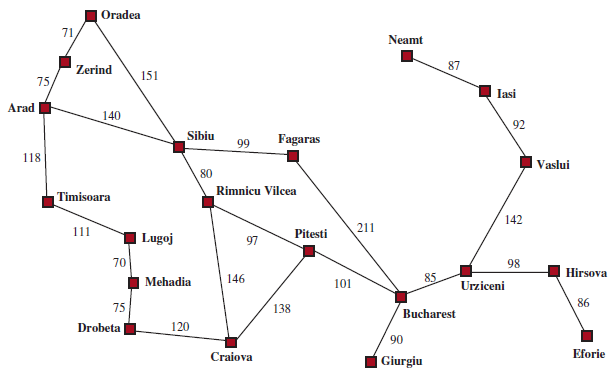

In [ ]:
romanian_map = {
    'Arad': { 'Zerind':75, 'Timisoara':118, 'Sibiu':140},
    'Zerind': {'Arad':75, 'Oradea':71},
    'Oradea': {'Zerind':71, 'Sibiu': 151},
    'Sibiu': {'Arad':140, 'Oradea':151, 'Fagaras':99, 'Rimnicu':80},
    'Timisoara': {'Arad': 118, 'Lugoj':111},
    'Lugoj': {'Timisoara':111, 'Mehadia':70},
    'Mehadia': {'Lugoj': 70, 'Drobeta':75},
    'Drobeta': {'Mehadia':75, 'Craiova':120},
    'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
    'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Fagaras': {'Sibiu':99, 'Bucharest':211},
    'Pitesti': {'Rimnicu': 97, 'Craiova':138, 'Bucharest':101},
    'Bucharest': {'Fagaras':211, 'Pitesti': 101, 'Giurgiu':90, 'Urziceni':85},
    'Giurgiu': {'Bucharest': 90},
    'Urziceni': {'Bucharest': 85, 'Vaslui':142, 'Hirsova':98},
    'Hirsova': {'Urziceni':98, 'Eforie':86},
    'Eforie': {'Hirsova':86},
    'Vaslui': {'Iasi': 92, 'Urziceni':142},
    'Iasi': {'Vaslui':92, 'Neamt': 87},
    'Neamt': {'Iasi':87}
}

In [ ]:
h_rm = {'Arad': 366, 'Zerind': 374, 'Oradea': 380, 'Sibiu': 253,
    'Timisoara': 329, 'Lugoj': 244, 'Mehadia': 241,
    'Drobeta': 242, 'Craiova': 160, 'Rimnicu': 193,
    'Fagaras': 176, 'Pitesti': 100, 'Bucharest': 0,
    'Giurgiu': 77, 'Urziceni': 80, 'Hirsova': 151,
    'Eforie': 161, 'Vaslui': 199, 'Iasi': 226, 'Neamt': 234}

In [ ]:
from queue import PriorityQueue

romanian_map = {
    'Arad': { 'Zerind':75, 'Timisoara':118, 'Sibiu':140},
    'Zerind': {'Arad':75, 'Oradea':71},
    'Oradea': {'Zerind':71, 'Sibiu': 151},
    'Sibiu': {'Arad':140, 'Oradea':151, 'Fagaras':99, 'Rimnicu':80},
    'Timisoara': {'Arad': 118, 'Lugoj':111},
    'Lugoj': {'Timisoara':111, 'Mehadia':70},
    'Mehadia': {'Lugoj': 70, 'Drobeta':75},
    'Drobeta': {'Mehadia':75, 'Craiova':120},
    'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
    'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Fagaras': {'Sibiu':99, 'Bucharest':211},
    'Pitesti': {'Rimnicu': 97, 'Craiova':138, 'Bucharest':101},
    'Bucharest': {'Fagaras':211, 'Pitesti': 101, 'Giurgiu':90, 'Urziceni':85},
    'Giurgiu': {'Bucharest': 90},
    'Urziceni': {'Bucharest': 85, 'Vaslui':142, 'Hirsova':98},
    'Hirsova': {'Urziceni':98, 'Eforie':86},
    'Eforie': {'Hirsova':86},
    'Vaslui': {'Iasi': 92, 'Urziceni':142},
    'Iasi': {'Vaslui':92, 'Neamt': 87},
    'Neamt': {'Iasi':87}
}

def ucs(start, goal, G):
    expanded = []
    pq = PriorityQueue()
    pq.put((0, [start]))

    while not pq.empty():
        print("\nQueue:", end='')
        for cost, path in pq.queue:
            print(f" {'-'.join(path)}:{cost}", end=', ')

        ucost, upath = pq.get()
        u = upath[-1]
        print(f"\n{'-'.join(upath)} is selected.", end=' ')

        if u in expanded:
            continue
        if u == goal:
            print(f'{goal} is SELECTED and Goal test is satisfied.')
            return upath, ucost
        print("Expanded list:", ','.join(expanded), u)
        expanded.append(u)

        for v in G[u]:
            if v not in expanded:
                pq.put((ucost + G[u][v], upath + [v]))

    print("Failed")

ucs_path, ucs_cost = ucs("Arad", "Bucharest", romanian_map)
print("\nPath:", ' -> '.join(ucs_path))
print("Total cost:", ucs_cost)



Queue: Arad:0, 
Arad is selected. Expanded list:  Arad

Queue: Arad-Zerind:75,  Arad-Timisoara:118,  Arad-Sibiu:140, 
Arad-Zerind is selected. Expanded list: Arad Zerind

Queue: Arad-Timisoara:118,  Arad-Sibiu:140,  Arad-Zerind-Oradea:146, 
Arad-Timisoara is selected. Expanded list: Arad,Zerind Timisoara

Queue: Arad-Sibiu:140,  Arad-Zerind-Oradea:146,  Arad-Timisoara-Lugoj:229, 
Arad-Sibiu is selected. Expanded list: Arad,Zerind,Timisoara Sibiu

Queue: Arad-Zerind-Oradea:146,  Arad-Sibiu-Rimnicu:220,  Arad-Sibiu-Oradea:291,  Arad-Sibiu-Fagaras:239,  Arad-Timisoara-Lugoj:229, 
Arad-Zerind-Oradea is selected. Expanded list: Arad,Zerind,Timisoara,Sibiu Oradea

Queue: Arad-Sibiu-Rimnicu:220,  Arad-Timisoara-Lugoj:229,  Arad-Sibiu-Oradea:291,  Arad-Sibiu-Fagaras:239, 
Arad-Sibiu-Rimnicu is selected. Expanded list: Arad,Zerind,Timisoara,Sibiu,Oradea Rimnicu

Queue: Arad-Timisoara-Lugoj:229,  Arad-Sibiu-Fagaras:239,  Arad-Sibiu-Oradea:291,  Arad-Sibiu-Rimnicu-Craiova:366,  Arad-Sibiu-Rimnic

Based on the above UCS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

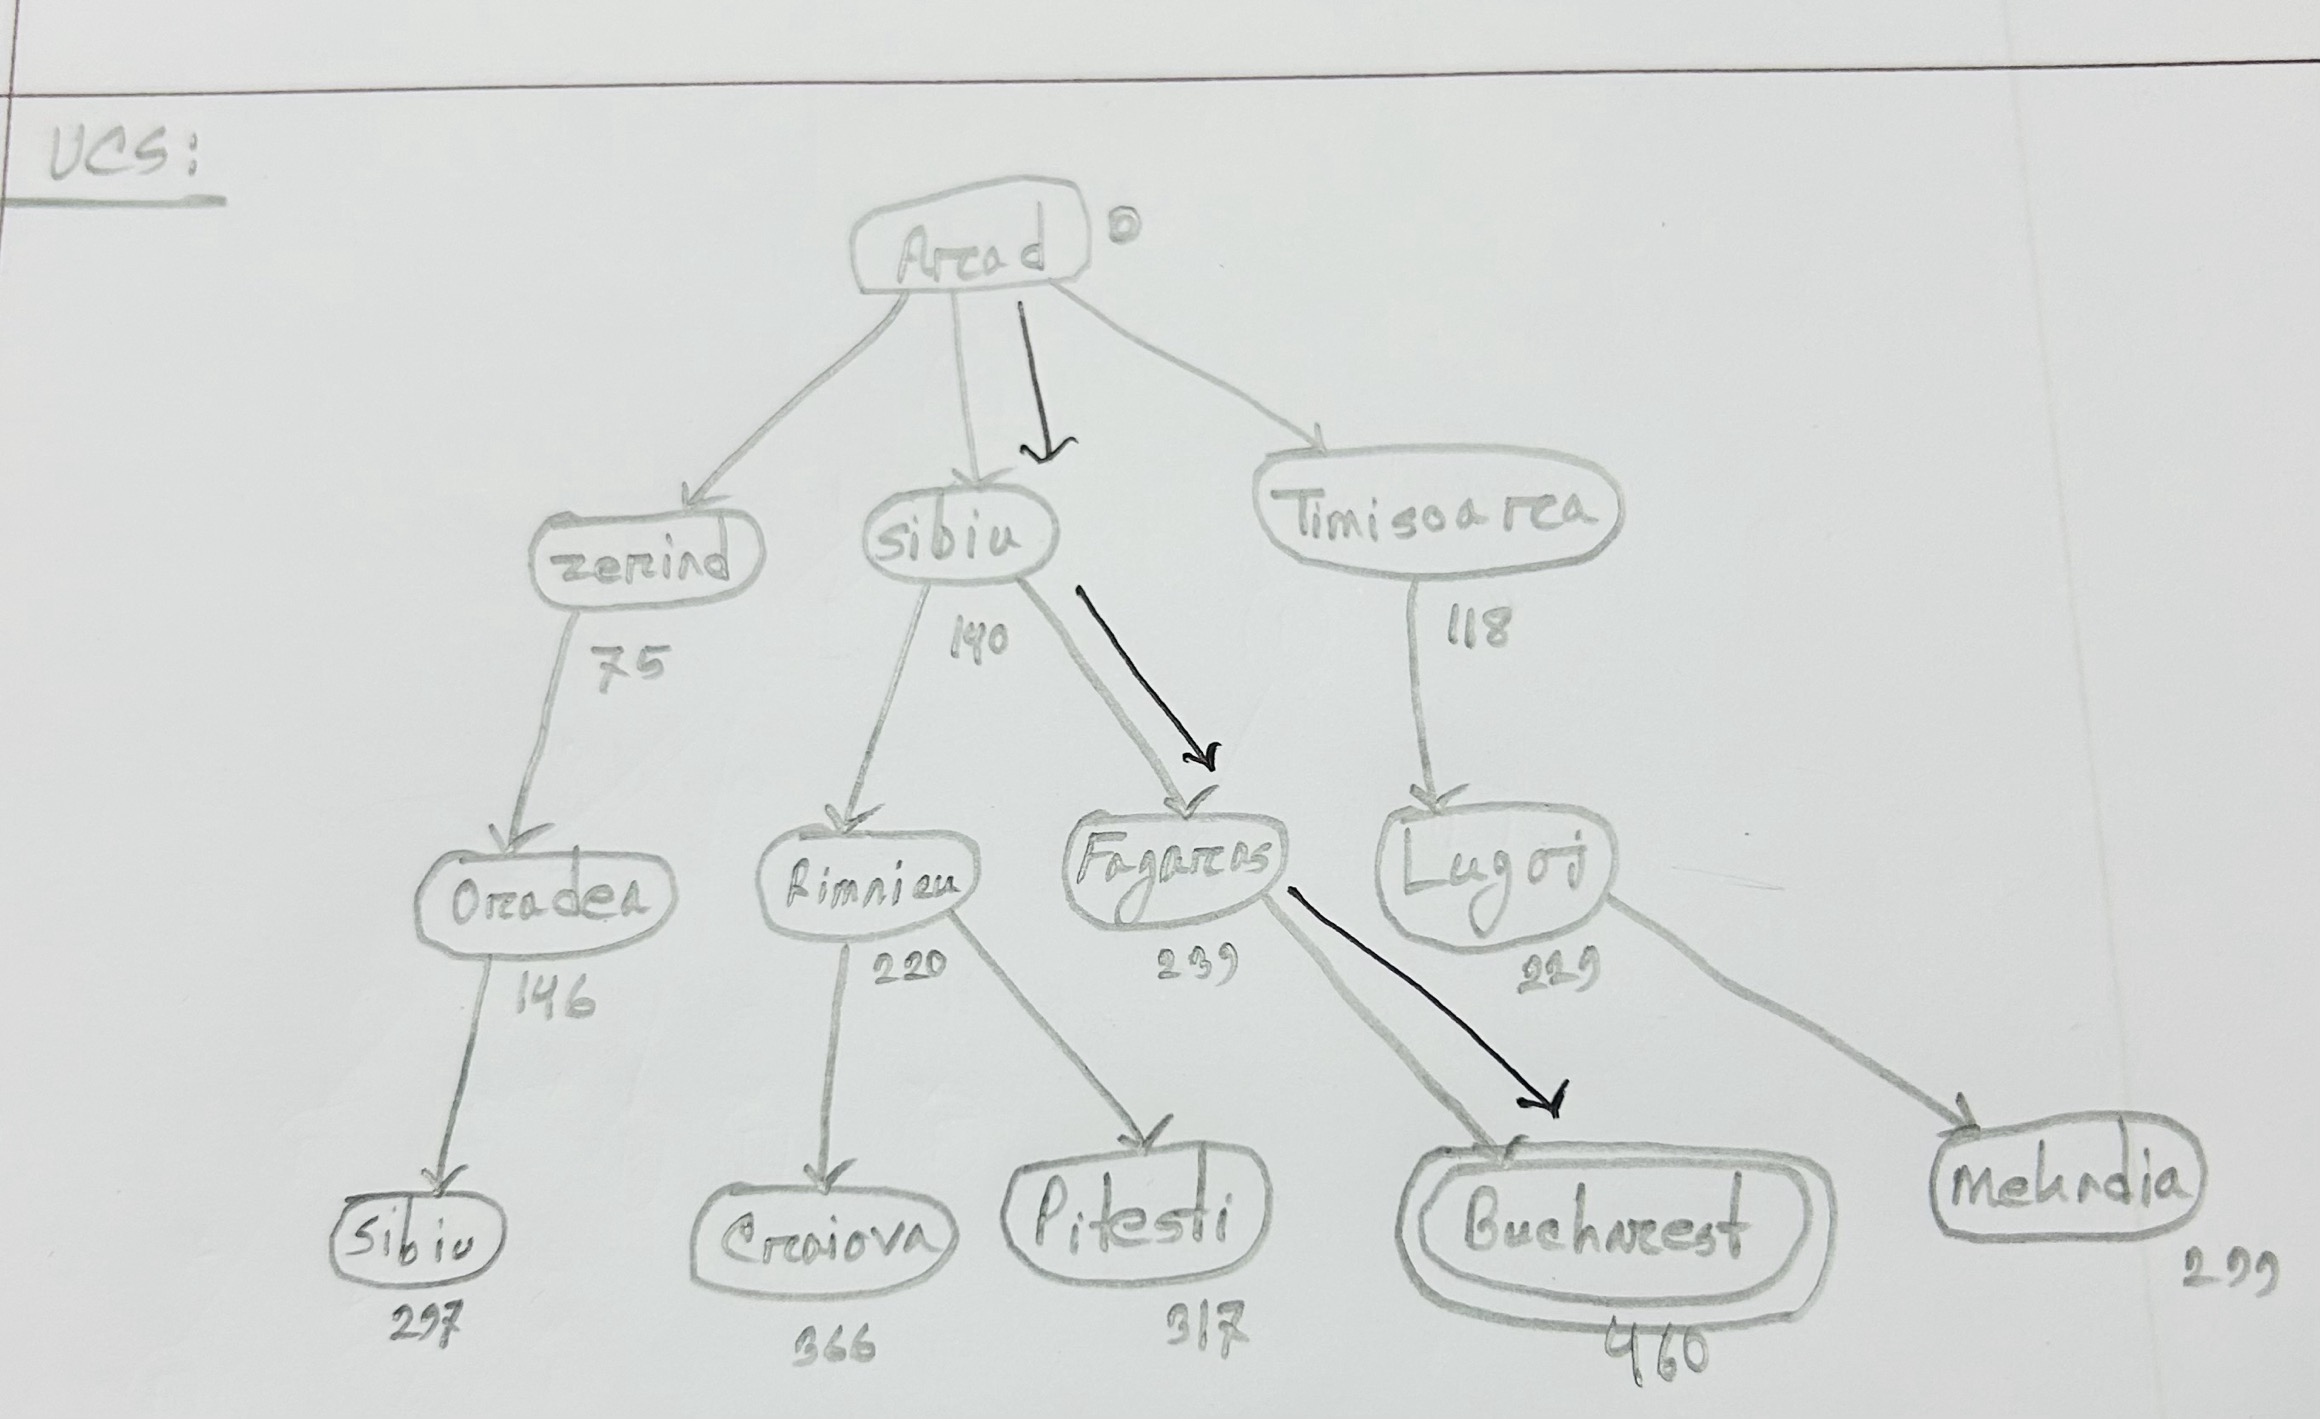

In [ ]:
def gbfs(start, goal, G, h):
    expanded = []
    pq = PriorityQueue()
    pq.put((h[start], 0, [start]))

    while not pq.empty():
        print("\nQueue:", end='')
        for heur, cost, path in pq.queue:
            print(f" {'-'.join(path)}:{heur}", end=', ')

        _, ucost, upath = pq.get()
        u = upath[-1]
        print(f"\n{'-'.join(upath)} is selected.", end=' ')

        if u in expanded:
            continue
        if u == goal:
            print(f'{goal} is SELECTED and Goal test is satisfied.')
            return upath, ucost
        print("Expanded list:", ','.join(expanded), u)
        expanded.append(u)

        for v in G[u]:
            if v not in expanded:
                pq.put((h[v], ucost + G[u][v], upath + [v]))

    print("Failed")

h_rm = {
    'Arad': 366, 'Zerind': 374, 'Oradea': 380, 'Sibiu': 253,
    'Timisoara': 329, 'Lugoj': 244, 'Mehadia': 241,
    'Drobeta': 242, 'Craiova': 160, 'Rimnicu': 193,
    'Fagaras': 176, 'Pitesti': 100, 'Bucharest': 0,
    'Giurgiu': 77, 'Urziceni': 80, 'Hirsova': 151,
    'Eforie': 161, 'Vaslui': 199, 'Iasi': 226, 'Neamt': 234
}

gbfs_path, gbfs_cost = gbfs("Arad", "Bucharest", romanian_map, h_rm)
print("\nPath:", ' -> '.join(gbfs_path))
print("Total cost (may not be optimal):", gbfs_cost)



Queue: Arad:366, 
Arad is selected. Expanded list:  Arad

Queue: Arad-Sibiu:253,  Arad-Zerind:374,  Arad-Timisoara:329, 
Arad-Sibiu is selected. Expanded list: Arad Sibiu

Queue: Arad-Sibiu-Fagaras:176,  Arad-Sibiu-Rimnicu:193,  Arad-Sibiu-Oradea:380,  Arad-Zerind:374,  Arad-Timisoara:329, 
Arad-Sibiu-Fagaras is selected. Expanded list: Arad,Sibiu Fagaras

Queue: Arad-Sibiu-Fagaras-Bucharest:0,  Arad-Sibiu-Rimnicu:193,  Arad-Sibiu-Oradea:380,  Arad-Zerind:374,  Arad-Timisoara:329, 
Arad-Sibiu-Fagaras-Bucharest is selected. Bucharest is SELECTED and Goal test is satisfied.

Path: Arad -> Sibiu -> Fagaras -> Bucharest
Total cost (may not be optimal): 450


Based on the above GBFS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

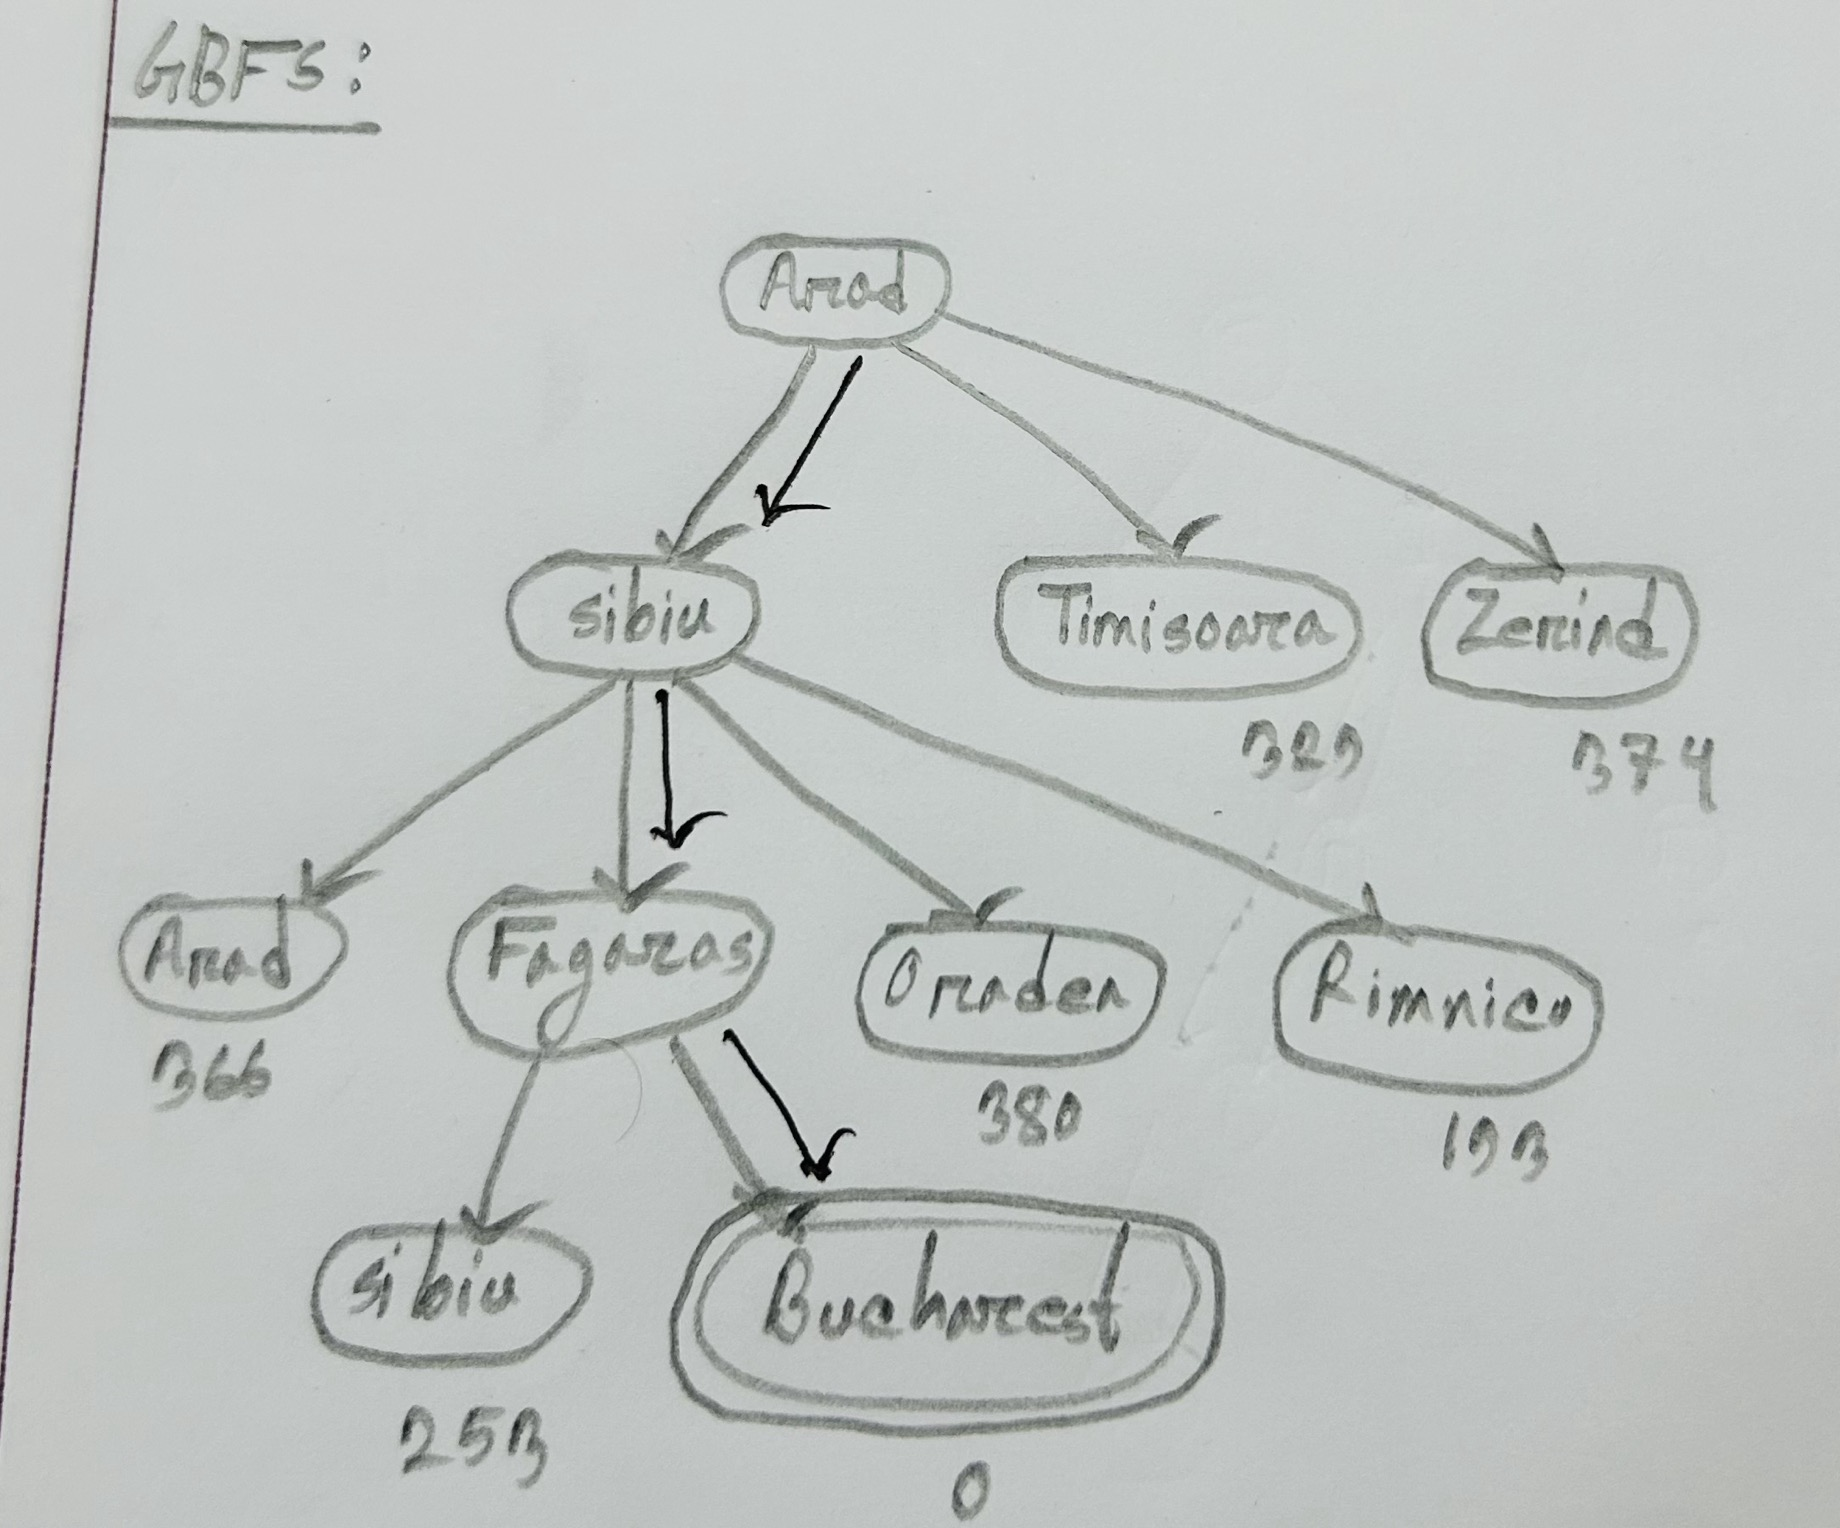

In [ ]:
def astar(start, goal, G, h):
    expanded = []
    pq = PriorityQueue()
    pq.put((h[start], 0, [start]))  # (f=g+h, g, path)

    while not pq.empty():
        print("\nQueue:", end='')
        for f, gval, path in pq.queue:
            print(f" {'-'.join(path)}:{f}", end=', ')

        fcost, gcost, upath = pq.get()
        u = upath[-1]
        print(f"\n{'-'.join(upath)} is selected.", end=' ')

        if u in expanded:
            continue
        if u == goal:
            print(f'{goal} is SELECTED and Goal test is satisfied.')
            return upath, gcost
        print("Expanded list:", ','.join(expanded), u)
        expanded.append(u)

        for v in G[u]:
            if v not in expanded:
                g_v = gcost + G[u][v]
                f_v = g_v + h[v]
                pq.put((f_v, g_v, upath + [v]))

    print("Failed")

astar_path, astar_cost = astar("Arad", "Bucharest", romanian_map, h_rm)
print("\nPath:", ' -> '.join(astar_path))
print("Total cost:", astar_cost)



Queue: Arad:366, 
Arad is selected. Expanded list:  Arad

Queue: Arad-Sibiu:393,  Arad-Zerind:449,  Arad-Timisoara:447, 
Arad-Sibiu is selected. Expanded list: Arad Sibiu

Queue: Arad-Sibiu-Rimnicu:413,  Arad-Sibiu-Fagaras:415,  Arad-Sibiu-Oradea:671,  Arad-Zerind:449,  Arad-Timisoara:447, 
Arad-Sibiu-Rimnicu is selected. Expanded list: Arad,Sibiu Rimnicu

Queue: Arad-Sibiu-Fagaras:415,  Arad-Timisoara:447,  Arad-Sibiu-Rimnicu-Pitesti:417,  Arad-Zerind:449,  Arad-Sibiu-Rimnicu-Craiova:526,  Arad-Sibiu-Oradea:671, 
Arad-Sibiu-Fagaras is selected. Expanded list: Arad,Sibiu,Rimnicu Fagaras

Queue: Arad-Sibiu-Rimnicu-Pitesti:417,  Arad-Timisoara:447,  Arad-Sibiu-Fagaras-Bucharest:450,  Arad-Zerind:449,  Arad-Sibiu-Rimnicu-Craiova:526,  Arad-Sibiu-Oradea:671, 
Arad-Sibiu-Rimnicu-Pitesti is selected. Expanded list: Arad,Sibiu,Rimnicu,Fagaras Pitesti

Queue: Arad-Sibiu-Rimnicu-Pitesti-Bucharest:418,  Arad-Zerind:449,  Arad-Timisoara:447,  Arad-Sibiu-Oradea:671,  Arad-Sibiu-Rimnicu-Craiova:52

Based on the above A* simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

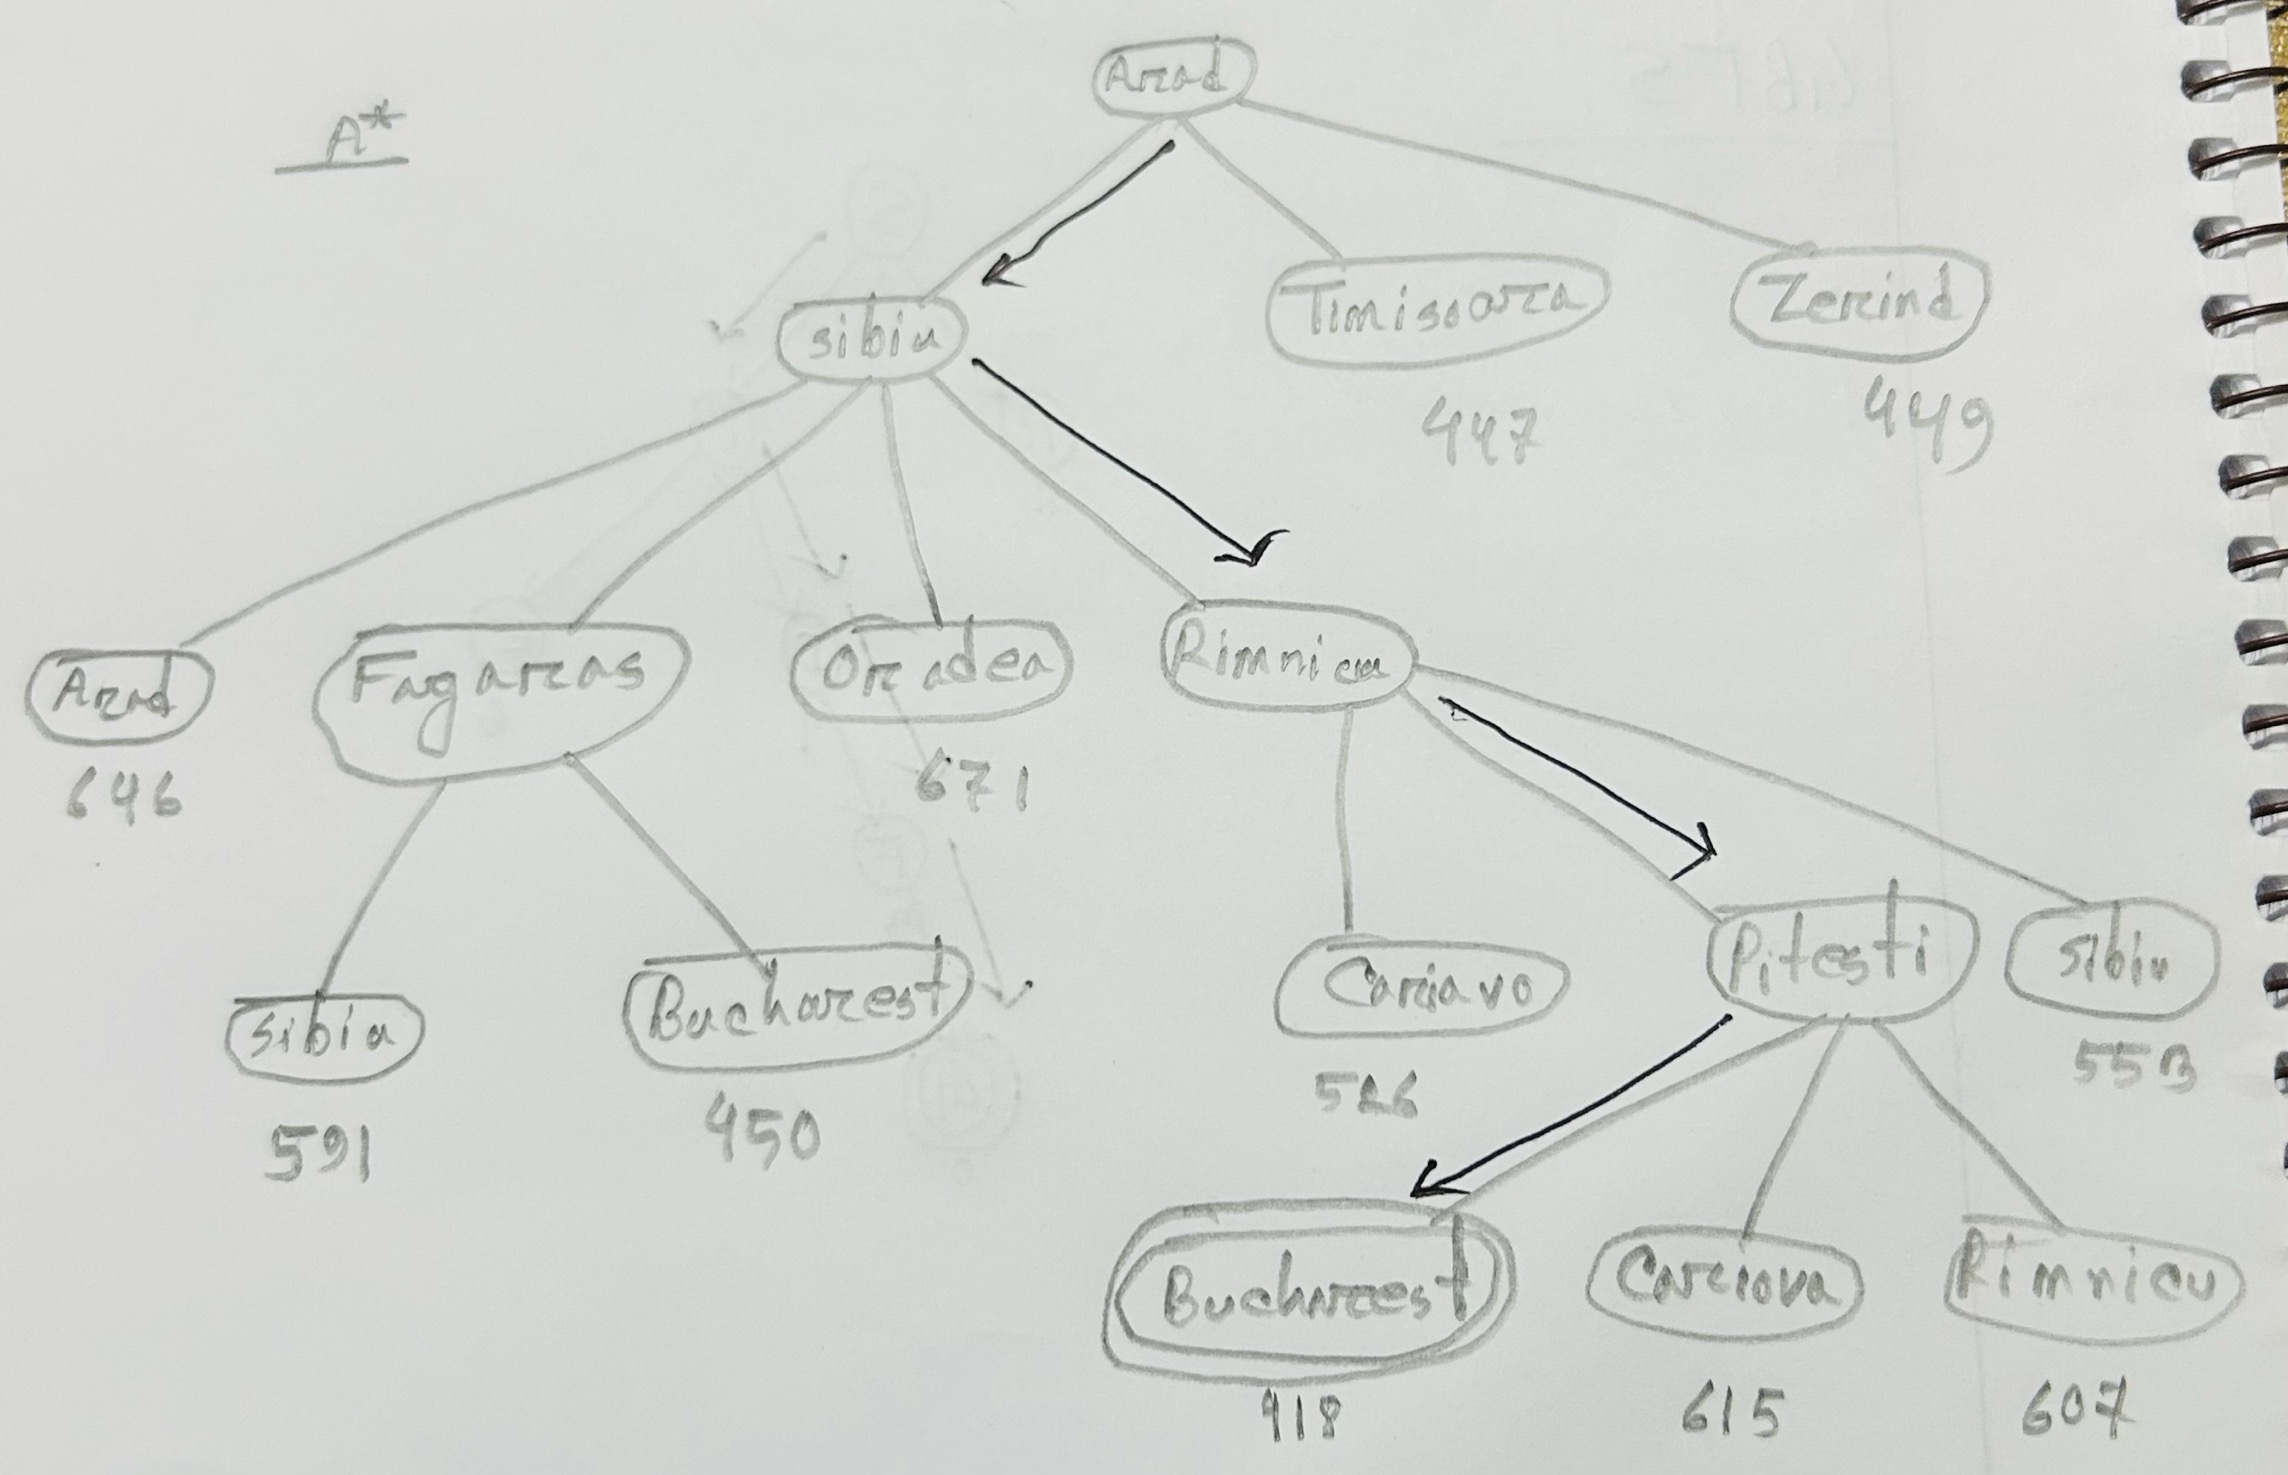

# New Exercise